# Интерполяция полиномом Ньютона

## Импорт библиотек

In [1]:
import sympy as sym  # библиотека символьных вычислений
import numpy as np # библиотека для работы с массивами
import math  # для операции факториала, числа pi
import matplotlib.pyplot as plt  # для построения графиков
import pandas as pd  # для построения таблицы
from IPython.display import display  # для вывода таблицы

## Инициализация символьных переменных и функции

In [2]:
x = sym.symbols('x')  # инициализировали символьные переменные
f = sym.Function('f')(x)  # инициализировали символьную функцию
# N = 1 - номер в списке группы
f = x - sym.sin(x) - 0.25  # определили функцию соответственно номеру в списке группы
a = 0
b = 10  # [a,b] - выбранный интервал интерполирования

## Метод Ньютона на равноотстоящих узлах

для вычисления разделенных разностей воспользовалась альтернативной формулой из примера.

In [3]:
# определим функцию для вычисления полинома Ньютона на равноотстоящих узлах
# Nn(n,f) где n - кол-во узлов интерполирования, f - функция, которую нужно интерполировать
def Nn(n, f):
    knots = [] # n равноотстоящих узлов интерполирования на [a,b]
    for i in range(n):
            xi = a + ((b-a)/(n-1))*i
            knots.append(xi)
    # print('knots = ', knots)
    rr = []  # в этот массив записываю значения разделенных разностей
    Nn = 0  # переменная для полинома Ньютона, проинициализировала нулём, т.к. буду прибавлять итеративно слагаемые
    
    # вычисление разделенных разностей 
    k=1  # индекс, отвечает за количество переменных в разделенной разности
    # внешний цикл, в нем запоминаем все разделенные разности
    for xj in knots: 
        knotsk = knots.copy() 
        knotsk = knotsk[0:k]  # запомнили первые k элементов из knots
        # print('knotsk = ', knotsk)
        rrk=0  # переменная для разделенной разности от k переменных, 0 т.к. буду итеративно прибавлять
        # внутренний цикл, в нем считаю разделенную разность от k переменных
        for xi in knotsk:  
            knotsk_wo_xi = knotsk.copy()
            knotsk_wo_xi.remove(xi)  # запомнили в переменную элементы knotsk кроме xi
            # print('knotsk_wo_xi = ', knotsk_wo_xi)
            gik = 1/np.prod([xi-xj for xj in knotsk_wo_xi])  # g_ik из альтернативной формулы для рр
            rrk+=f.subs(x, xi)*gik  #  прибавили слагаемое из формулы разделенной разности
        rr.append(rrk)  # запомнили в массив значение k-й разделенной разности
        k+=1
        # print('rr=', rr)
    
    # вычисление полинома Ньютона
    for i in range(n):
        Nn += rr[i]*np.prod([x-knots[k] for k in range(i)])
    return Nn 

## Метод Ньютона на оптимальных узлах

Всё то же самое, заменила только knots в начале. Для наглядности и дальнейшего использования, написала отдельно.

In [4]:
def Nn_opt(n, f):
    knots = list(((b-a)*sym.cos((2*i+1)*math.pi/(2*(n+1)))+b+a)/2 for i in range(n)) # оптимальные узлы интерполирования
    # print('knots_opt = ', knots)
    rr = []  # в этот массив записываю значения разделенных разностей
    Nn = 0  # переменная для полинома Ньютона, проинициализировала нулём, т.к. буду прибавлять итеративно слагаемые
    
    # вычисление разделенных разностей 
    k=1  # индекс, отвечает за количество переменных в разделенной разности
    # внешний цикл, в нем запоминаем все разделенные разности
    for xj in knots: 
        knotsk = knots.copy() 
        knotsk = knotsk[0:k]  # запомнили первые k элементов из knots
        # print('knotsk = ', knotsk)
        rrk=0  # переменная для разделенной разности от k переменных, 0 т.к. буду итеративно прибавлять
        # внутренний цикл, в нем считаю разделенную разность от k переменных
        for xi in knotsk:  
            knotsk_wo_xi = knotsk.copy()
            knotsk_wo_xi.remove(xi)  # запомнили в переменную элементы knotsk кроме xi
            # print('knotsk_wo_xi = ', knotsk_wo_xi)
            gik = 1/np.prod([xi-xj for xj in knotsk_wo_xi])  # g_ik из альтернативной формулы для рр
            rrk+=f.subs(x, xi)*gik  #  прибавили слагаемое из формулы разделенной разности
        rr.append(rrk)  # запомнили в массив значение k-й разделенной разности
        k+=1
        # print('rr=', rr)
    
    # вычисление полинома Ньютона
    for i in range(n):
        Nn += rr[i]*np.prod([x-knots[k] for k in range(i)])
    return Nn 

#### определим функцию подсчета максимума отклонения ИПН от функции f(x) на интервале [a,b] по равноотстоящим узлам

In [5]:
def RN(n, m, f):
    N_n = Nn(n, f)  # полином Ньютона
    T = list((b-a)/(m+1)*(i+1) for i in range(m))  # массив точек разбиения [a,b], в которых определяется отклонение 
    r = [f.subs(x, ti) - N_n.subs(x, ti) for ti in T]  # массив отклонений ИПН в точках T
    return max(r)

#### определим функцию подсчета максимума отклонения ИПЛ от функции f(x) на интервале [a,b] по оптимальным узлам

In [6]:
def RN_opt(n, m, f):
    N_n = Nn_opt(n, f)  # полином Ньютона
    T = list((b-a)/(m+1)*(i+1) for i in range(m))  # массив точек разбиения [a,b], в которых определяется отклонение 
    r = [f.subs(x, ti) - N_n.subs(x, ti) for ti in T]  # массив отклонений ИПН в точках T
    return max(r)

# Заполнение таблицы

In [7]:
df = pd.DataFrame({'n': [], 'm':[], 'RNn': [], 'RNoptn':[]})  # для построения таблицы поведения ИПН при увеличении количества узлов интерполирования
n_knots = [3, 5, 10, 15, 30, 50]  # количество узлов интерполирования
for n in n_knots:
    m = 20*n  # – количество точек разбиения интервала интерполирования, в которых определяется отклонение ИПН от функции
    RNn = RN(n, m, f)
    RNn_opt = RN_opt(n, m, f)
    line = {'n': int(n), 'm':int(m), 'RNn': RNn, 'RNoptn': RNn_opt}
    df = df.append(line, ignore_index=True)
    # print(Nn(n, f))
    print(line)  # добавлено, чтобы понимать, что функция работает, а не зависла
print()
print('Итоговая таблица: ')
display(df)

{'n': 3, 'm': 60, 'RNn': 0.0605266008205625, 'RNoptn': 1.52956194861095}
{'n': 5, 'm': 100, 'RNn': 1.00725410485002, 'RNoptn': 2.19877286816435}
{'n': 10, 'm': 200, 'RNn': 0.0209866120110139, 'RNoptn': 0.0105846091640446}
{'n': 15, 'm': 300, 'RNn': 1.63812120490547e-6, 'RNoptn': 2.20853628485340e-6}
{'n': 30, 'm': 600, 'RNn': 3.18699822088320e-9, 'RNoptn': 0.0717416145237769}
{'n': 50, 'm': 1000, 'RNn': 5.77342636957634e-5, 'RNoptn': 0.000374354353525064}

Итоговая таблица: 


,n,m,RNn,RNoptn
0,3.0,60.0,0.0605266008205625,1.52956194861095
1,5.0,100.0,1.00725410485002,2.19877286816435
2,10.0,200.0,0.0209866120110139,0.0105846091640446
3,15.0,300.0,1.63812120490547e-6,2.20853628485340e-6
4,30.0,600.0,3.18699822088320e-9,0.0717416145237769
5,50.0,1000.0,5.77342636957634e-5,0.000374354353525064


# Построение графиков
## По равноотстоящим узлам

Text(0, 0.5, 'Nn(x), n=50')

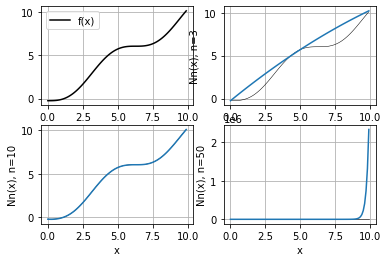

In [8]:
ab = np.arange(0,10,0.1)  # промежуток построения графиков
fx = np.array([f.subs(x, i) for i in ab])  # исходная функция на промежутке [0,10]
N3 = Nn(3,f)  # Ln(x), n=3
N10 = Nn(10,f)  # Ln(x), n=10
N50 = Nn(50,f)  # Ln(x), n=50 
N3x = np.array([N3.subs(x, i) for i in ab])  # массив значений Ln(x), n = 3, x в промежутке [0,10]
N10x = np.array([N10.subs(x, i) for i in ab])  # массив значений Ln(x), n = 10, x в промежутке [0,10]
N50x = np.array([N50.subs(x, i) for i in ab])  # массив значений Ln(x), n = 50, x в промежутке [0,10]

plt.figure(1)
plt.subplot(221)
plt.grid()
plt.plot(ab, fx, 'k')
plt.legend(['f(x)'])
plt.subplot(222)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, N3x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Nn(x), n=3')
plt.subplot(223)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, N10x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Nn(x), n=10')
plt.subplot(224)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, N50x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Nn(x), n=50')

Text(0.5, 1.0, 'График №1, по равноотстоящим узлам')

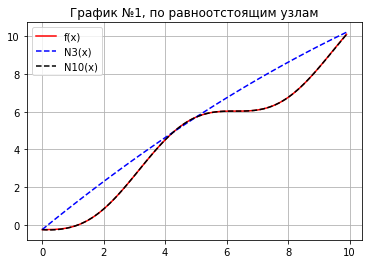

In [9]:
plt.figure(2)
plt.grid()
plt.plot(ab, fx, '-r')
plt.plot(ab, N3x, 'b--')  
plt.plot(ab, N10x, 'k--')
# plt.plot(ab, N50x, '--')  # сбивается график при n=50
plt.legend(['f(x)', 'N3(x)', 'N10(x)'])
plt.title('График №1, по равноотстоящим узлам')

При малых и больших n метод сработал неудачно

Видим, что в середине отрезка интерполяция хорошая, а ближе к концам отрезка - выбросы

## по оптимальным узлам

Text(0, 0.5, 'Nn_opt(x), n=50')

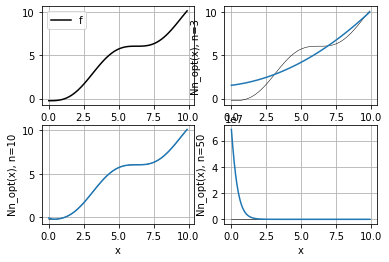

In [10]:
N3 = Nn_opt(3,f)  # Nn_opt(x), n=3
N10 = Nn_opt(10,f)  # Nn_opt(x), n=10
N50 = Nn_opt(50,f)  # Nn_opt(x), n=50 
N3x = np.array([N3.subs(x, i) for i in ab])  # массив значений Nn_opt(x), n = 3, x в промежутке [0,10]
N10x = np.array([N10.subs(x, i) for i in ab])  # массив значений Nn_opt(x), n = 10, x в промежутке [0,10]
N50x = np.array([N50.subs(x, i) for i in ab])  # массив значений Nn_opt(x), n = 50, x в промежутке [0,10]

plt.figure(3)
plt.subplot(221)
plt.grid()
plt.plot(ab, fx, 'k')
plt.legend('f(x)')
plt.subplot(222)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, N3x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Nn_opt(x), n=3')
plt.subplot(223)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, N10x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Nn_opt(x), n=10')
plt.subplot(224)
plt.plot(ab, fx, 'k', linewidth = 0.5)
plt.plot(ab, N50x)
plt.grid()
plt.xlabel('x')
plt.ylabel('Nn_opt(x), n=50')

Text(0.5, 1.0, 'График №2')

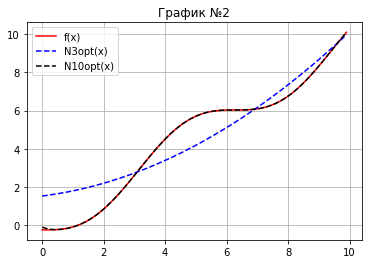

In [11]:
plt.figure(4)
plt.grid()
plt.plot(ab, fx, '-r')
plt.plot(ab, N3x, 'b--')  
plt.plot(ab, N10x, 'k--')
# plt.plot(ab, N50x, '--')  # сбивается график при n=50
plt.legend(['f(x)', 'N3opt(x)', 'N10opt(x)'])
plt.title('График №2')